<AxesSubplot:>

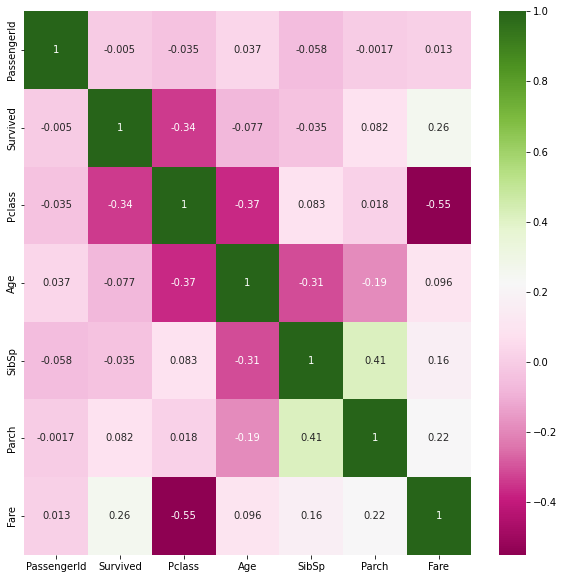

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rf
import os
import seaborn as sns

for file in os.listdir('titanic'):
    if file=='test.csv':
        test_df=pd.read_csv('titanic/'+file)
    elif file=='train.csv':
        train_df=pd.read_csv('titanic/'+file)
    elif file=='gender_submission.csv':
        submission_df=pd.read_csv('titanic/'+file)
plt.figure(figsize=(10,10))
sns.color_palette("tab10")
sns.heatmap(train_df.corr(),annot=True,cmap='PiYG')

# # f, ax = plt.subplots(figsize=(10, 8))
# # sns.heatmap(train_df.corr(),mask=np.zeros_like(train_df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #             square=True, ax=ax)
# train_df['Fare_class']=train_df.apply(lambda x: 'high' if x['Fare']>=200 else ('low' if x['Fare']<50 else 'Middle' ), axis=1)
# test_df['Fare_class']=test_df.apply(lambda x: 'high' if x['Fare']>=200 else ('low' if x['Fare']<50 else 'Middle' ), axis=1)
# train_df['AGE_GROUP']=train_df.apply(lambda x: 'kid' if x['Age']<10 else ('teen' if x['Age']>10 and x['Age']<18 else ('adult' if x['Age']>18 and x['Age']<60 else 'elder')),axis=1)
# train_df['AGE_GROUP']
# test_df['AGE_GROUP']=train_df.apply(lambda x: 'kid' if x['Age']<10 else ('teen' if x['Age']>10 and x['Age']<18 else ('adult' if x['Age']>18 and x['Age']<60 else 'elder')),axis=1)
# features=['Pclass','Fare_class','Sex','SibSp','AGE_GROUP','Parch']
# y=train_df['Survived']
# x=pd.get_dummies(train_df[features])
# XTest=pd.get_dummies(test_df[features])
# model=rf(n_estimators=100,max_depth=10,random_state=1)
# model.fit(x,y)
# predictions=model.predict(XTest)
# output=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions})
# output.to_csv('titanic/submission.csv',index=False)

<AxesSubplot:xlabel='Cabin,Survived'>

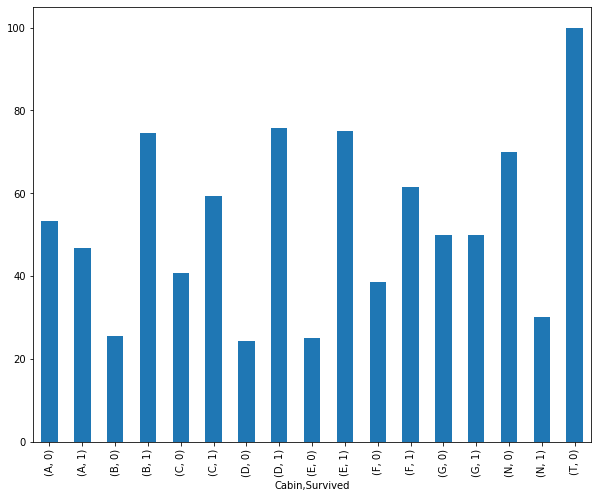

In [97]:
# train_df[train_df['Survived']==1].describe()
# train_df.isna().sum()
# train_df[train_df['Age'].isna()].groupby(['Survived','Pclass']).count()
# train_df[train_df['Survived']==1].describe()
train_df['Cabin'].fillna('None',inplace=True)
train_df.groupby('Cabin').size()
train_df['Cabin']=train_df['Cabin'].apply(lambda x: x[0])
sample=train_df.groupby(['Cabin','Survived']).size()
sample.groupby(level=0).apply(lambda x: 100*x/x.sum()).plot(kind='bar',stacked=True,figsize=(10,8))

In [ ]:
train_df[train_df['Survived']==0].describe()

In [ ]:
fare_sur_df=train_df.groupby(['Fare_class','Survived']).size()
fare_sur_df.groupby(level=0).apply(lambda x: 100*x/x.sum()).plot(kind='bar',stacked=True,figsize=(10,8))

In [ ]:
train_df['Fare_class']=train_df.apply(lambda x: 'high' if x['Fare']>=200 else ('low' if x['Fare']<50 else 'Middle' ), axis=1)
fare_sur_df=train_df.groupby(['Fare_class','Pclass','Survived']).size()
fare_sur_df.groupby(level=0).apply(lambda x: 100*x/x.sum()).plot(kind='bar',stacked=True,figsize=(10,8))

In [ ]:
# train_df['Fare_class']=train_df.apply(lambda x: 'high' if x['Fare']>=200 else ('low' if x['Fare']<50 else 'Middle' ), axis=1)
train_df.Name

In [74]:
import re
pattern=re.compile(r",.*\. ")
seprate=[]
for name in train_df.Name:
    if re.search(pattern,name):
        seprate.append(re.search(pattern,name).group(0)[2:-2])
train_df['Sir_name']=seprate
# train_df.groupby('Sir_name').size().plot(kind='bar',stacked=True,figsize=(10,8))
train_df[train_df['Sir_name']=="Dr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sir_name
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


In [71]:
# train_df.groupby(['Sir_name','Survived']).size().plot(kind='bar',stacked=True,figsize=(10,8))
train_df.groupby('Sir_name').size()

Sir_name
Capt                          1
Col                           2
Don                           1
Dr                            7
Jonkheer                      1
Lady                          1
Major                         2
Master                       40
Miss                        182
Mlle                          2
Mme                           1
Mr                          517
Mrs                         124
Mrs. Martin (Elizabeth L      1
Ms                            1
Rev                           6
Sir                           1
the Countess                  1
dtype: int64